## How to plot oncoprints using PyOncoPrint
2022 Oct 09 by Jeongbin Park

First, import PyOncoPrint:

In [1]:
import pyoncoprint

And now you need to create Pandas dataframes for input data to PyOncoPrint. Of coruse you can create ones based on your own data, but here we are going to parse an exisiting data (TCGA Lung Adenocarcinoma data) downloaded from CBioPortal for this step.

The link is here: 
https://www.cbioportal.org/results/oncoprint?Z_SCORE_THRESHOLD=2.0&RPPA_SCORE_THRESHOLD=2.0&data_priority=0&profileFilter=0&case_set_id=luad_tcga_pan_can_atlas_2018_cnaseq&gene_list=KRAS%2520HRAS%2520BRAF%2520RAF1%2520MAP3K1%2520MAP3K2%2520MAP3K3%2520MAP3K4%2520MAP3K5%2520MAP2K1%2520MAP2K2%2520MAP2K3%2520MAP2K4%2520MAP2K5%2520MAPK1%2520MAPK3%2520MAPK4%2520MAPK6%2520MAPK7%2520MAPK8%2520MAPK9%2520MAPK12%2520MAPK14%2520DAB2%2520RASSF1%2520RAB25&geneset_list=%20&tab_index=tab_visualize&Action=Submit&genetic_profile_ids_PROFILE_MUTATION_EXTENDED=luad_tcga_pan_can_atlas_2018_mutations&genetic_profile_ids_PROFILE_COPY_NUMBER_ALTERATION=luad_tcga_pan_can_atlas_2018_gistic&cancer_study_list=luad_tcga_pan_can_atlas_2018&heatmap_track_groups=luad_tcga_pan_can_atlas_2018_rna_seq_v2_mrna_median_Zscores%2CKRAS%2CHRAS%2CBRAF&generic_assay_groups=luad_tcga_pan_can_atlas_2018_methylation_hm27_hm450_merge%2Ccg00083937%2Ccg00584022%2Ccg03148461%3Bluad_tcga_pan_can_atlas_2018_microbiome_signature%2CDicipivirus

Click on the `Download` drop-down button, and select `Tabular`. Save it as `tcga.tsv`.

In [2]:
import pandas as pd
df = pd.read_csv('./tcga.tsv', sep='\t', header=0)
df

,track_name,track_type,TCGA-75-5122,TCGA-91-6836,TCGA-55-7576,TCGA-MN-A4N5,TCGA-05-4250,TCGA-44-7661,TCGA-55-8094,TCGA-55-7910,...,TCGA-97-7547,TCGA-97-7552,TCGA-97-7553,TCGA-97-7937,TCGA-97-8171,TCGA-97-8172,TCGA-97-8175,TCGA-97-8552,TCGA-99-AA5R,TCGA-99-7458
0,Mutation spectrum (C>A),CLINICAL,35,250,152,197,127,125,195,138,...,52,10,11,221,10,95,7,1,25,213
1,Mutation spectrum (C>G),CLINICAL,23,46,50,50,44,48,36,36,...,27,2,3,47,1,19,1,3,5,45
2,Mutation spectrum (C>T),CLINICAL,36,88,89,63,62,49,63,56,...,41,12,17,81,26,60,13,12,8,72
3,Mutation spectrum (T>A),CLINICAL,10,36,28,31,22,30,38,30,...,17,1,1,32,7,31,2,2,8,44
4,Mutation spectrum (T>C),CLINICAL,7,17,27,36,33,11,29,13,...,9,5,3,30,5,19,2,1,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,BRAF,HEATMAP MRNA_EXPRESSION Z-SCORE,-0.6797,5.2897,1.1695,-0.5823,0.6957,0.3878,-0.2288,6.457,...,0.8356,0.0788,-0.4651,2.0759,7.0309,0.7332,0.305,-0.1679,-0.1476,2.3042
141,MAPK8IP2 (cg00083937),HEATMAP GENERIC_ASSAY LIMIT-VALUE,0.600965908700663,0.514129069512132,0.769616641690092,0.69812664900243,0.799070919493019,0.735822579583125,0.361008209097112,0.630354044620056,...,0.623778472407134,0.633609288317926,0.54642110622505,0.631079279204004,0.732681630567305,0.592728811697244,0.496287855914758,0.665203642263098,0.551299407128214,0.709720731852182
142,KRAS (cg00584022),HEATMAP GENERIC_ASSAY LIMIT-VALUE,0.123185115853844,0.103182406931248,0.0845806422558687,0.0804645393662329,0.034977088701612,0.096996190112915,0.0882108260000217,0.113635599474597,...,0.095941729018427,0.0901545613459016,0.0814066610882022,0.0853239456276608,0.0833049758333343,0.0848861489750851,0.0754859048203185,0.0814194766677976,0.0730163447478739,0.102924639761319
143,BRAF (cg03148461),HEATMAP GENERIC_ASSAY LIMIT-VALUE,0.253221532756634,0.314714448622058,0.175502326046151,0.199490038605513,0.16635472520355,0.182602923604932,0.130195145286553,0.210478907183298,...,0.20693462766731,0.162659808367077,0.127852563358744,0.195969928076319,0.191672391433231,0.189341493924862,0.166175555640827,0.137579202655474,0.108811644153095,0.176726250022531


The dataframe contains all the tracks used to draw oncoprint. Thus we need to separate them into dataframes: one for oncoprint, and the others for each annotation track.

First, create a dataframe for oncoprint:

In [3]:
df_oncoprint = df[df['track_type'].isin(['MUTATIONS', 'CNA', 'STRUCTURAL_VARIANT', 'PROTEIN', 'MRNA'])].drop(columns=['track_type']).set_index('track_name').fillna('')

# Fix broken names
df_oncoprint.replace('amp_rec', 'Amplification', inplace=True)
df_oncoprint.replace('homdel_rec', 'Deep Deletion', inplace=True)
df_oncoprint.replace('splice', 'Splice Mutation (putative driver)', inplace=True)
df_oncoprint.replace('splice_rec', 'Splice Mutation (putative passenger)', inplace=True)
df_oncoprint.replace('sv', 'Structural Variant (putative driver)', inplace=True)
df_oncoprint.replace('sv_rec', 'Structural Variant (putative passenger)', inplace=True)

Also, create dataframes for heatmaps:

In [4]:
df_all_heatmaps = df[df['track_type'].str.startswith('HEATMAP')].set_index('track_name').drop(columns=['track_type']).astype(float)
df_all_heatmaps

,TCGA-75-5122,TCGA-91-6836,TCGA-55-7576,TCGA-MN-A4N5,TCGA-05-4250,TCGA-44-7661,TCGA-55-8094,TCGA-55-7910,TCGA-99-8028,TCGA-55-7283,...,TCGA-97-7547,TCGA-97-7552,TCGA-97-7553,TCGA-97-7937,TCGA-97-8171,TCGA-97-8172,TCGA-97-8175,TCGA-97-8552,TCGA-99-AA5R,TCGA-99-7458
track_name,,,,,,,,,,,,,,,,,,,,,
KRAS,5.995900,10.873800,2.210500,2.067500,5.394300,3.258900,12.838400,0.732600,0.711700,0.702600,...,0.237000,0.642900,-0.619000,-0.251000,-0.825700,1.787900,0.469300,-0.826200,-1.120700,0.641100
HRAS,-0.805900,-1.202100,-0.595700,0.346800,-0.446700,0.439600,0.215000,-0.536900,0.093400,-0.617200,...,-0.587200,-1.054100,-1.123700,-0.418100,-0.683400,-0.233000,0.628300,-0.285700,0.066300,-0.833300
BRAF,-0.679700,5.289700,1.169500,-0.582300,0.695700,0.387800,-0.228800,6.457000,-0.037600,0.155200,...,0.835600,0.078800,-0.465100,2.075900,7.030900,0.733200,0.305000,-0.167900,-0.147600,2.304200
MAPK8IP2 (cg00083937),0.600966,0.514129,0.769617,0.698127,0.799071,0.735823,0.361008,0.630354,0.626548,0.715711,...,0.623778,0.633609,0.546421,0.631079,0.732682,0.592729,0.496288,0.665204,0.551299,0.709721
KRAS (cg00584022),0.123185,0.103182,0.084581,0.080465,0.034977,0.096996,0.088211,0.113636,0.086538,0.103583,...,0.095942,0.090155,0.081407,0.085324,0.083305,0.084886,0.075486,0.081419,0.073016,0.102925
BRAF (cg03148461),0.253222,0.314714,0.175502,0.199490,0.166355,0.182603,0.130195,0.210479,0.124208,0.145364,...,0.206935,0.162660,0.127853,0.195970,0.191672,0.189341,0.166176,0.137579,0.108812,0.176726
Dicipivirus,NaN,1.818539,2.995816,3.148315,3.848246,3.184577,2.605129,2.897750,1.360822,4.783737,...,4.021537,4.949840,3.603823,4.322136,3.743562,3.596431,4.375761,3.974692,2.860782,3.933477


In [5]:
heatmaps = {
    'mRNA expression z-scores relative to diploid samples (RNA Seq V2 RSEM)': {
        'heatmap': df_all_heatmaps.iloc[:3],
        'cmap': 'RdBu_r',
        'vmin': -3,
        'vmax': 3
    },
    'Methylation (HM27 and HM450 merge)': {
        'heatmap': df_all_heatmaps.iloc[3:6],
        'cmap': 'Blues',
        'vmin': 0,
    },
    'Microbiome Signatures (log RNA Seq CPM)': {
        'heatmap': df_all_heatmaps.iloc[6:],
        'cmap': 'copper',
    },
}

And the annotations:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('jet')

annotations = {}

df_all_annotations = df[df['track_type'].isin(['CLINICAL'])].drop(columns=['track_type']).set_index('track_name')

# Mutation Spectrum
#
# As this contains multiple rows of numbers, PyOncoPrint creates a stacked bar plot
#
df_ms = df_all_annotations[df_all_annotations.index.str.startswith('Mutation spectrum')].fillna('0').astype(int)
df_ms.index = df_ms.index.map(lambda x: x.split(' ')[-1][1:-1])
annotations['Mutation spectrum'] = {
    'annotations': df_ms,
    'colors': {k: v for k, v in zip(df_ms.index, cmap(np.linspace(0, 1, df_ms.index.size, dtype=float)))},
    'order': 0,
}

# MSI MANTIS Score
#
# As this contains a single row of numbers, PyOncoPrint creates a bar plot
#
df_mms = df_all_annotations[df_all_annotations.index == 'MSI MANTIS Score'].fillna('0').astype(float)
annotations['MSI MANTIS Score'] = {
    'annotations': df_mms,
    'color': 'green',
    'order': 1,
}

# American Joint Committee on Cancer Tumor Stage Code
#
# As this contains a row of strings, PyOncoPrint creates a categorical heatmap
#
df_stagecode = df_all_annotations[df_all_annotations.index == 'American Joint Committee on Cancer Tumor Stage Code']
uniq_annots = sorted(pd.unique(df_stagecode.values.ravel()))
annotations['American Joint Committee on Cancer Tumor Stage Code'] = {
    'annotations': df_stagecode,
    'colors': {k: v for k, v in zip(uniq_annots, cmap(np.linspace(0, 1, len(uniq_annots), dtype=float)))},
    'order': 2
}

Next, we define markers.

1. If marker is 'fill' or 'rect': A rectangular patch will be drawn in the cell.
    - Possible keywords:
        - width and height: in ratio (from 0 to 1). The patch will be centered in the cell.
        - zindex: The index of the object in z-axis (defult is 1). The one with higher zorder is always in front of another one with lower zorder.
        - Any other keywords: kwargs for a `PatchCollection` object.

2. If marker is a Patch object: The Patch object will be drawn in the cell. The object should be within the cell coordinates, i.e (0,0) ls bottom left, (1,1) is top right.
    - Possible keywords:
        - marker: Patch object (e.g., Polygon)
        - width and height: in ratio (from 0 to 1). The patch will be centered in the cell.
        - zindex: z-index.
        - Any other keywords: kwargs for a `PatchCollection` object.

3. If marker is not any of above: Any available marker defined in `https://matplotlib.org/3.1.3/api/markers_api.html` will be drawn using 'scatter' plotting method.
    - Possible keywords:
        - zindex: z-index.
        - Any other keywords: kwargs for 'scatter', including 'marker'.

In [7]:
from matplotlib.patches import Polygon, Rectangle

mutation_markers = {
    "Amplification": dict(
        marker="fill",
        color="red",
        zindex=0
    ),
    "Deep Deletion": dict(
        marker="fill",
        color="blue",
        zindex=0
    ),
    "Splice Mutation (putative driver)": dict(
        marker="fill",
        color="darkorange",
        height=0.5,
        zindex=1
    ),
    "Splice Mutation (putative passenger)": dict(
        marker="fill",
        color="orange",
        height=0.5,
        zindex=1
    ),
    "Structural Variant (putative driver)": dict(
        marker="*",
        color="purple",
        lw=0,
        zindex=2
    ),
    "Structural Variant (putative passenger)": dict(
        marker="*",
        color="fuchsia",
        lw=0,
        zindex=2
    ),
    "Inframe Mutation (putative driver)": dict(
        marker="fill",
        color="brown",
        height=0.5,
        zindex=1
    ),
    "Missense Mutation (putative driver)": dict(
        marker=Polygon([[0, 0], [1, 1], [1, 0]]),
        color="green",
        linewidth=0,
        zindex=1
    ),
    "Missense Mutation (putative passenger)": dict(
        marker="fill",
        color="lime",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative driver)": dict(
        marker="fill",
        color="black",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative passenger)": dict(
        marker="fill",
        color="yellow",
        height=0.5,
        zindex=1
    ),
}

Finally, create an oncoprint object, and then plot oncoprint:

In [8]:
op = pyoncoprint.OncoPrint(df_oncoprint)

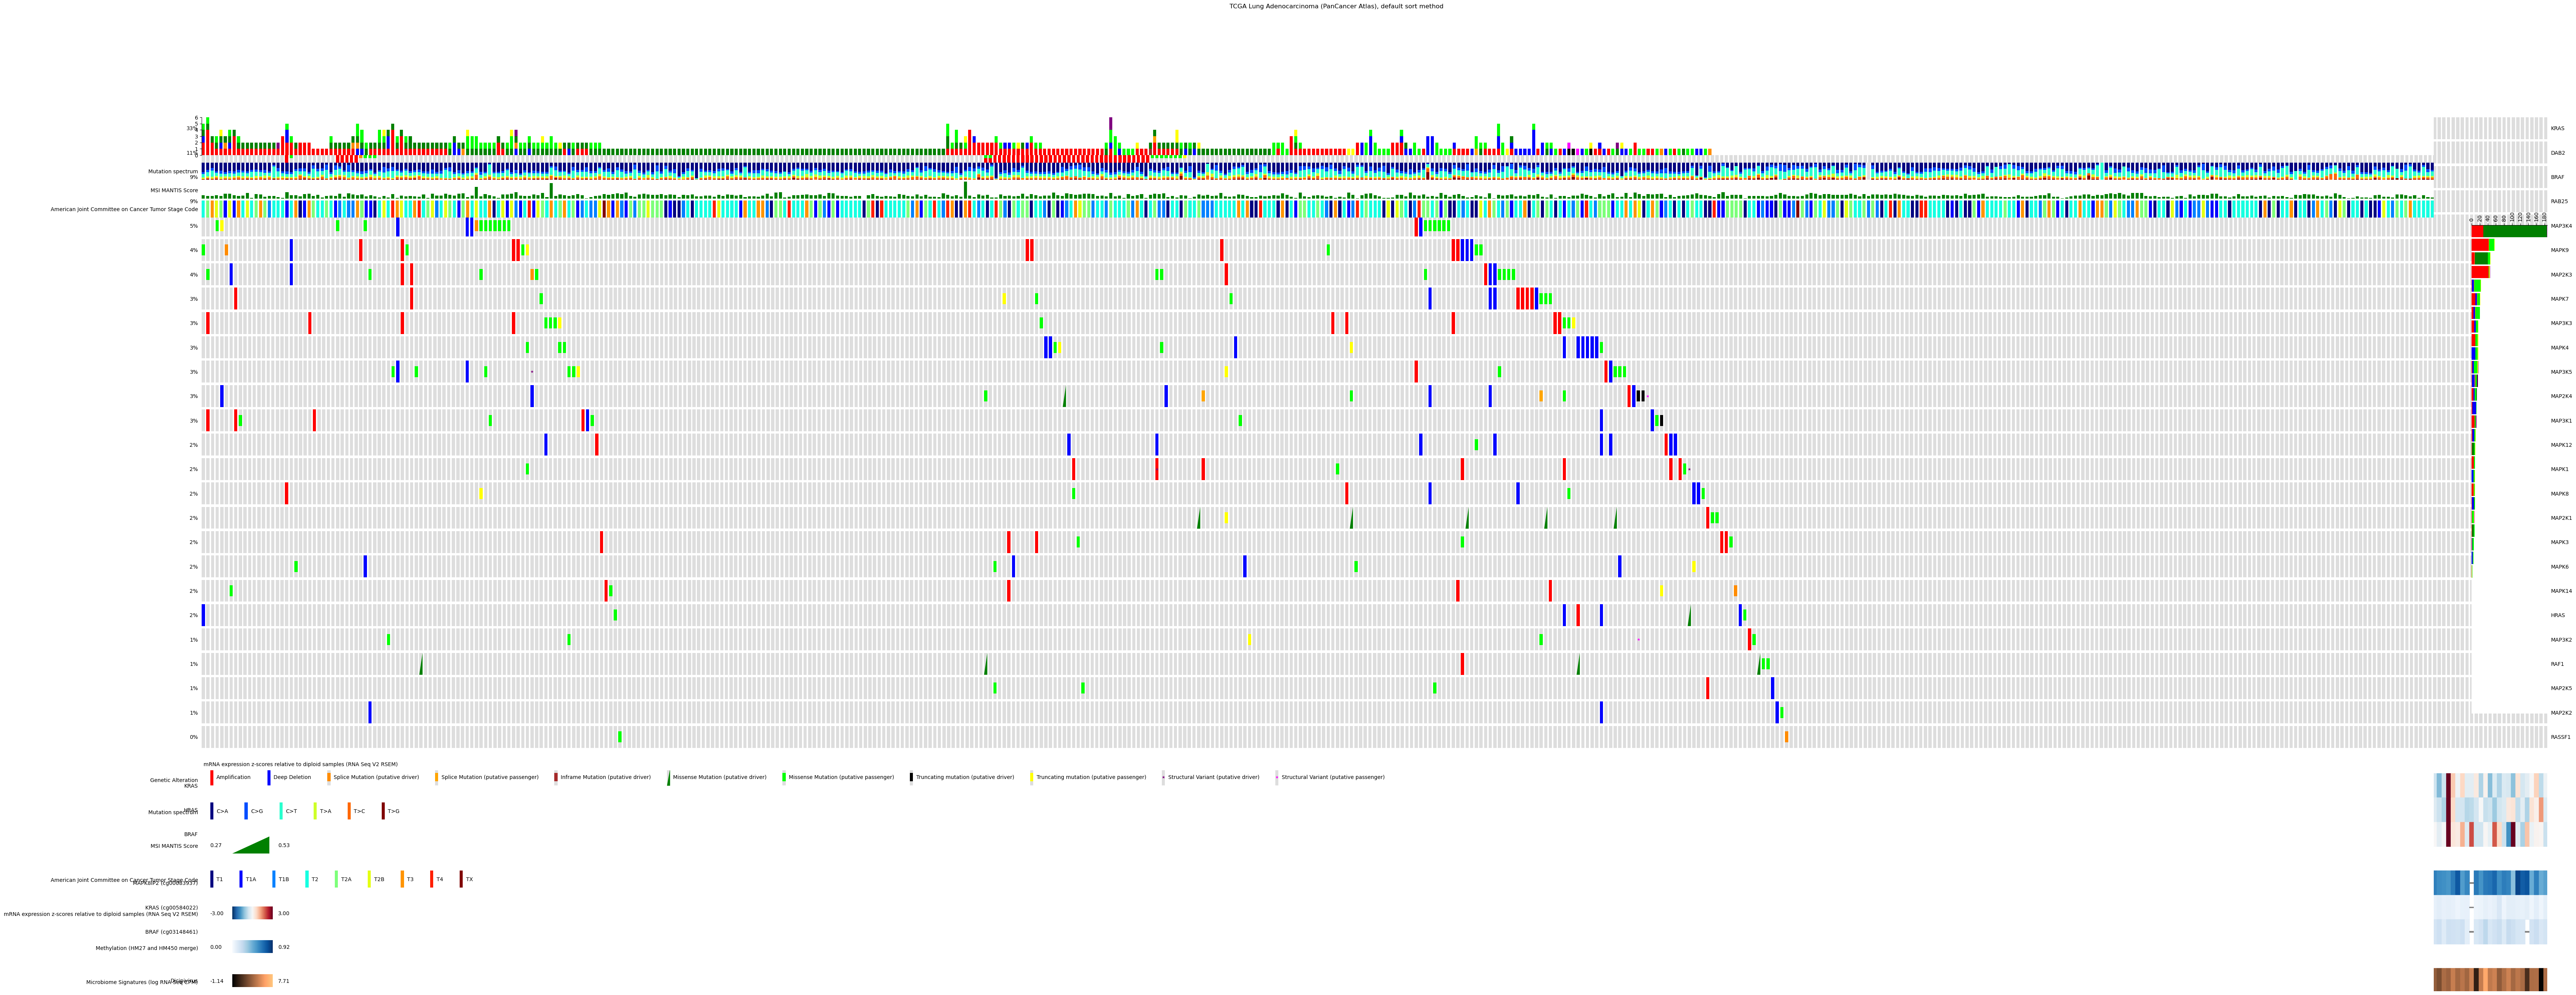

In [10]:
fig, axes = op.oncoprint(mutation_markers,
                         annotations=annotations,
                         heatmaps=heatmaps,
                         figsize=[80, 30],
                         gap=[0.3, 0.1],                     # gap between cells (ratio)
                         title="TCGA Lung Adenocarcinoma (PanCancer Atlas), default sort method",
                         topplot=True, rightplot=True, legend=True)
# return values: figure, (oncoprint_axis, oncoprint_dual_axis, axis_top_barplot, axis_right_barplot, axis_legend)
fig.patch.set_facecolor('white')
plt.savefig("oncoprint.png")
pass